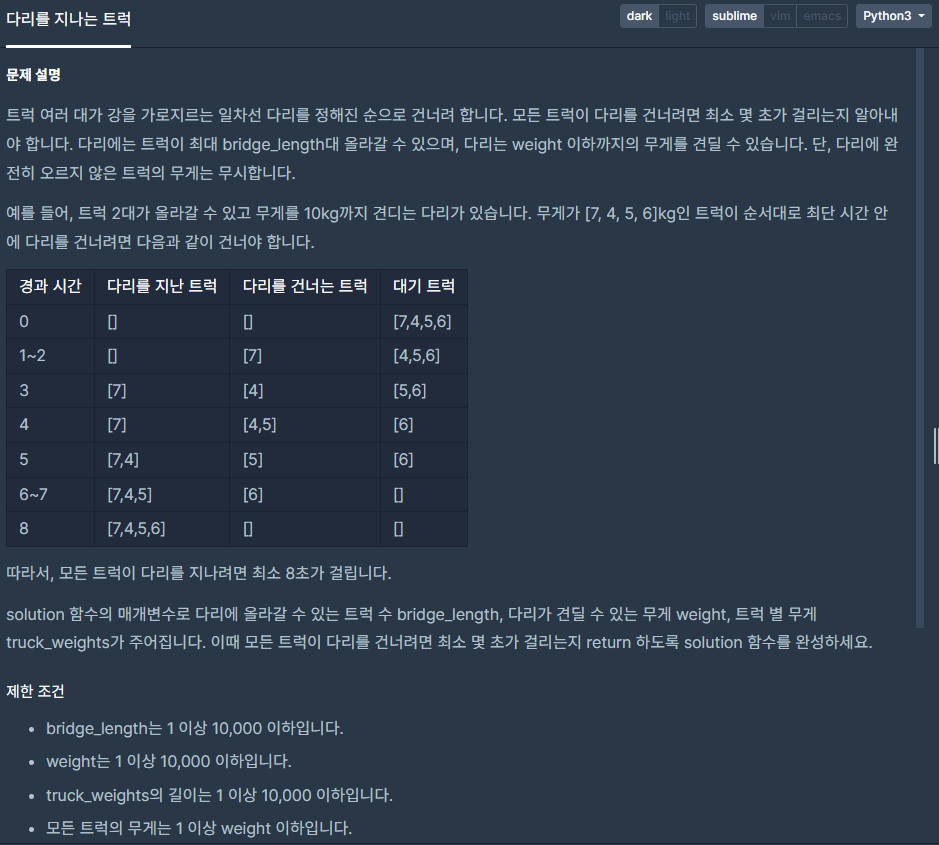
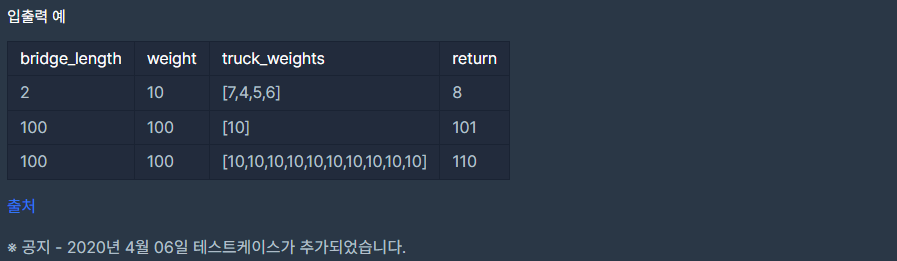

* 링크 : https://programmers.co.kr/learn/courses/30/lessons/42583


설명이 좀 이상한데 조건을 추가하자면 다음과 같음
1. 1초에 한 대 움직임(다리에 들어올 수 있음)
2. 트럭이 들어가는 순서 정해져있음
ex)
트럭들 ... [ | ] ... out  - 0초
트럭들 ... [7| ] ... out  - 1초 한 대 들어옴
트럭들 ... [ |7] ... out  - 2초 다리는 10kg까지 버티므로 다음 차(5kg)가 못들어옴
트럭들 ... [4| ] ... out  - 3초
트럭들 ... [5|4] ... out  - 4초 10kg < 4+5kg 이므로 가능
트럭들 ... [ |5] ... out  - 5초 다리는 10kg까지 버티므로 다음 차(6kg)가 못들어옴

In [106]:
''' 내가 푼 - 히든케이스 5번에서 시간 초과 '''
from collections import deque

def solution(bridge_length, weight, truck_weights):
    answer = 1    
    for i in range(bridge_length): truck_weights.append(0)
        
    truck_weights.reverse()
    
    bridge = deque(maxlen=bridge_length)
    bridge.append(truck_weights.pop())
    
    while bridge and truck_weights:
        if len(bridge) + 1 > bridge_length:
            bridge.popleft()
        elif bridge == [0]*bridge_length: break
            
        if len(bridge) <= bridge_length and sum(bridge)+truck_weights[-1] <= weight:
            bridge.append(truck_weights.pop())
            answer += 1            
        else:
            bridge.append(0)
            answer += 1
    
    return answer

print(solution(2, 10, [7,4,5,6]))
print('---')
print(solution(100, 100, [10]))
print('---')
print(solution(100, 100, [10,10,10,10,10,10,10,10,10,10]))

8
---
101
---
110


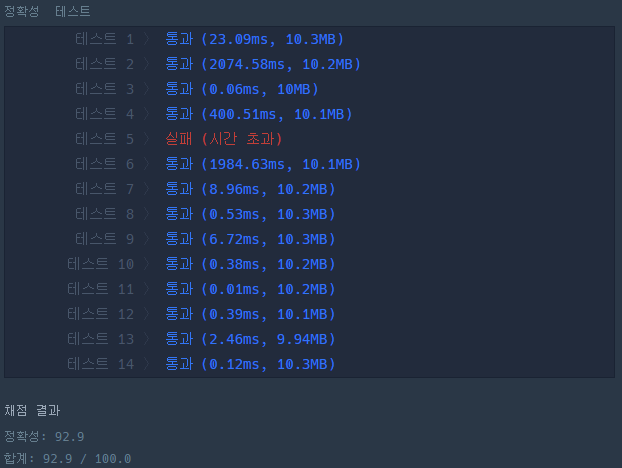

In [121]:
''' 내가 푼 - 히든케이스 5번에서 시간 초과 해결 => sum()은 O(N) '''
from collections import deque

def solution(bridge_length, weight, truck_weights):
    answer = 1
    
    for i in range(bridge_length): truck_weights.append(0)
        
    truck_weights.reverse()
    
    bridge = deque(maxlen=bridge_length)
    
    # do-while 구현이 안되므로(answer = 1부터)
    t_weight = truck_weights.pop()
    next_bridge_weight = t_weight    
    bridge.append(t_weight) 
        
    while bridge and truck_weights:
        
        # 다리의 공간이 없으므로 pop
        if len(bridge) + 1 > bridge_length:  
            tmp = bridge.popleft()
            next_bridge_weight -= tmp
        elif bridge == [0]*bridge_length: break
            
        # 다리에 공간이 있고 무게가 된다면
        if len(bridge) <= bridge_length and next_bridge_weight+truck_weights[-1] <= weight:            
            t_weight = truck_weights.pop()
            bridge.append(t_weight)
            next_bridge_weight += t_weight
            answer += 1            
        else:
            bridge.append(0)
            answer += 1
    
    return answer

print(solution(2, 10, [7,4,5,6]))
print(solution(100, 100, [10,10,10,10,10,10,10,10,10,10]))

8
110


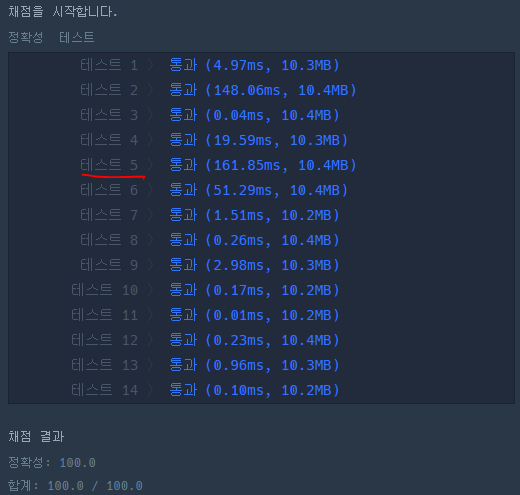